In [22]:
import torch 

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

if device==torch.device("cpu"):
    print("No gpu device available!")

No gpu device available!


In [1]:
!pygmentize Mnist_code/mnist_train.py

# Copyright 2020 Amazon.com, Inc. or its affiliates. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License"). You
# may not use this file except in compliance with the License. A copy of
# the License is located at
#
#     http://aws.amazon.com/apache2.0/
#
# or in the "license" file accompanying this file. This file is
# distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF
# ANY KIND, either express or implied. See the License for the specific
# language governing permissions and limitations under the License.

from __future__ import print_function

import argparse
from packaging.version import Version
import os
import time

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.optim.lr_scheduler import StepLR
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter
impo

In [28]:
from sagemaker import ProfilerConfig, Profiler
profiler_config = ProfilerConfig(profile_params = Profiler(cpu_profiling_duration=500))

In [24]:
from sagemaker.pytorch import PyTorch
from sagemaker import ProfilerConfig, Profiler

from sagemaker.local import LocalSession
import sagemaker

# Creates a SageMaker session to interact with the AWS environment.
sagemaker_session = LocalSession()
# Set up the local SageMaker session
local_session = LocalSession()
local_session.config = {"local": {"local_code": True}}

# Fetches the AWS region name for the current session.
region = sagemaker_session.boto_region_name

# Retrieves the default Amazon S3 bucket for the SageMaker session.
bucket = sagemaker_session.default_bucket()

# Specifies a folder prefix within the bucket for organizing resources.
prefix = "sagemaker/DEMO-sagemaker-profiler"

# Fetches the IAM role ARN associated with the SageMaker notebook or instance.
role = sagemaker.get_execution_role()

# Script
mpi_options = {
    "enabled": True,
    "processes_per_host": 1,
}

dist_option = {
        "pytorchddp": {
            "enabled": True,
            "custom_mpi_options": "-verbose -x NCCL_DEBUG=VERSION",
            "mpi": mpi_options,
        }
}

instance_type="local"
env = {
    "SAGEMAKER_REQUIREMENTS": "requirements.txt", 
}

estimator = PyTorch(
    base_job_name="Mounir-pytorch-mnist-profiler",
    source_dir="Mnist_code",
    entry_point="mnist_train.py",
    role=role,
    framework_version="1.11.0",
    py_version="py38",
    instance_count=1,
    instance_type=instance_type,
    sagemaker_session=local_session,  # Use the local session
)

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [25]:
 estimator.fit()

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: Mounir-pytorch-mnist-profiler-2024-11-28-04-53-56-121
INFO:sagemaker.local.image:'Docker Compose' is not installed. Proceeding to check for 'docker-compose' CLI.
INFO:sagemaker.local.image:'Docker Compose' found using Docker Compose CLI.
INFO:sagemaker.local.local_session:Starting training job
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:sagemaker.local.image:No AWS credentials found in session but credentials from EC2 Metadata Service are available.
INFO:sagemaker.local.image:docker compose file: 
networks:
  sagemaker-local:
    name: sagemaker-local
services:
  algo-1-uoa0q:
    command: train
    container_name: fzavvkcvok-algo-1-uoa0q
    environment:
    - '[Masked]'
    - '[Masked]'
    - '[Masked]'
    image: 763104351884.dkr.ecr.us-west-2.amazonaws.com/pytorch-tra

 Container fzavvkcvok-algo-1-uoa0q  Creating
 Container fzavvkcvok-algo-1-uoa0q  Created
Attaching to fzavvkcvok-algo-1-uoa0q
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,403 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,406 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,408 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,419 sagemaker-training-toolkit INFO     instance_groups entry not present in resource_config
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,426 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,434 sagemaker_pytorch_container.training INFO     Invoking user training script.
fzavvkcvok-algo-1-uoa0q  | 2024-11-27 23:53:57,435

INFO:root:creating /tmp/tmphh2b8mx2/artifacts/output/data


KeyboardInterrupt: 

In [29]:
from sagemaker.pytorch import PyTorch
from sagemaker import ProfilerConfig, Profiler

import sagemaker

# Creates a SageMaker session to interact with the AWS environment.
sagemaker_session = sagemaker.Session()

# Fetches the AWS region name for the current session.
region = sagemaker_session.boto_region_name

# Retrieves the default Amazon S3 bucket for the SageMaker session.
bucket = sagemaker_session.default_bucket()


# Specifies a folder prefix within the bucket for organizing resources.
prefix = "sagemaker/DEMO-sagemaker-profiler"

# Fetches the IAM role ARN associated with the SageMaker notebook or instance.
role = sagemaker.get_execution_role()

# Script
mpi_options = {
    "enabled": True,
    "processes_per_host": 1,
}

instance_type="ml.g4dn.12xlarge"

estimator = PyTorch(
    base_job_name="Mounir-pytorch-mnist-profiler",
    source_dir="Mnist_code",
    entry_point="mnist_train.py",
    role=role,
    framework_version="1.11.0",
    py_version="py38",
    instance_count=1,
    instance_type=instance_type,
    sagemaker_session=sagemaker_session,
    profiler_config=profiler_config
)

In [30]:
 estimator.fit()

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: Mounir-pytorch-mnist-profiler-2024-11-28-05-44-00-789


2024-11-28 05:44:01 Starting - Starting the training job...
2024-11-28 05:44:26 Starting - Preparing the instances for trainingDetailedProfilerProcessingJobConfig-2024-11-28-05-44-00-862: InProgress
...
2024-11-28 05:44:52 Downloading - Downloading input data...
2024-11-28 05:45:26 Downloading - Downloading the training image.....................
2024-11-28 05:48:54 Training - Training image download completed. Training in progress....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-11-28 00:49:21,446 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-11-28 00:49:21,483 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2024-11-28 00:49:21,496 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-11-28 00:49:21,498 sagemaker_pytorch_container.training INFO     Invoking user training script.
2024-11

In [20]:
profiler_artifacts_path = estimator.latest_job_profiler_artifacts_path()
print(profiler_artifacts_path)

s3://sagemaker-us-west-2-785721480234/Mounir-pytorch-mnist-profiler-2024-11-28-04-28-03-432/profiler-output


In [13]:
import boto3
import os

# S3 bucket and prefix
s3_bucket = 'sagemaker-us-west-2-785721480234'
profiler_prefix = 'Mounir-pytorch-mnist-profiler-2024-11-26-12-57-35-830/profiler-output/'

# Create a local folder for downloading the profiler files
local_dir = 'profiler_output'
os.makedirs(local_dir, exist_ok=True)

# Initialize S3 client
s3 = boto3.client('s3')

# List and download files
response = s3.list_objects_v2(Bucket=s3_bucket, Prefix=profiler_prefix)
for obj in response.get('Contents', []):
    file_key = obj['Key']
    local_file_path = os.path.join(local_dir, os.path.basename(file_key))
    s3.download_file(s3_bucket, file_key, local_file_path)
    print(f"Downloaded: {local_file_path}")

Downloaded: profiler_output/smprofiler_algo-1_58_1732626116322881820_0.smpraw
Downloaded: profiler_output/smprofiler_algo-1_58_1732628361698298207_0.smpraw
Downloaded: profiler_output/training_job_end.ts
Downloaded: profiler_output/1732625880.algo-1.json
Downloaded: profiler_output/1732625940.algo-1.json
Downloaded: profiler_output/1732626000.algo-1.json
Downloaded: profiler_output/1732626060.algo-1.json
Downloaded: profiler_output/1732626120.algo-1.json
Downloaded: profiler_output/1732626180.algo-1.json
Downloaded: profiler_output/1732626240.algo-1.json
Downloaded: profiler_output/1732626300.algo-1.json
Downloaded: profiler_output/1732626360.algo-1.json
Downloaded: profiler_output/1732626420.algo-1.json
Downloaded: profiler_output/1732626480.algo-1.json
Downloaded: profiler_output/1732626540.algo-1.json
Downloaded: profiler_output/1732626600.algo-1.json
Downloaded: profiler_output/1732626660.algo-1.json
Downloaded: profiler_output/1732626720.algo-1.json
Downloaded: profiler_output/173

In [44]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Directory containing the JSON files
json_dir = './profiler_output'

# List to store all parsed data
data = []

# Parse JSON files
for file_name in os.listdir(json_dir):
    if file_name.endswith('.json'):
        with open(os.path.join(json_dir, file_name), 'r') as file:
            for line in file:
                try:
                    record = json.loads(line.strip())
                    data.append(record)
                except json.JSONDecodeError:
                    print(f"Error decoding line in file {file_name}")
df = pd.DataFrame(data)
df_cpu0 = pd.DataFrame(data).loc[df['Name'] == 'cpu0']
df_cpu1 = pd.DataFrame(data).loc[df['Name'] == 'cpu1']
df_memory = pd.DataFrame(data).loc[df['Name'] == 'MemoryUsedPercent']


print(df)

          Type                    Name          Dimension     Value  NodeId  \
0       memory       MemoryUsedPercent                        29.06  algo-1   
1          cpu                    cpu0     CPUUtilization     16.28  algo-1   
2          cpu                    cpu0  I/OWaitPercentage      0.00  algo-1   
3          cpu                    cpu1     CPUUtilization    100.00  algo-1   
4          cpu                    cpu1  I/OWaitPercentage      0.00  algo-1   
...        ...                     ...                ...       ...     ...   
63601      cpu                    cpu1  I/OWaitPercentage      0.00  algo-1   
63602  network   ReceiveBytesPerSecond          Algorithm      0.00  algo-1   
63603  network  TransmitBytesPerSecond          Algorithm      0.00  algo-1   
63604  network   ReceiveBytesPerSecond           Platform   2535.39  algo-1   
63605  network  TransmitBytesPerSecond           Platform  13347.87  algo-1   

          Timestamp  
0      1.732626e+09  
1      

In [56]:
# string in the list
if 'Backward' in df["Name"].values[40000:40500]:
    print('A is present in the list')

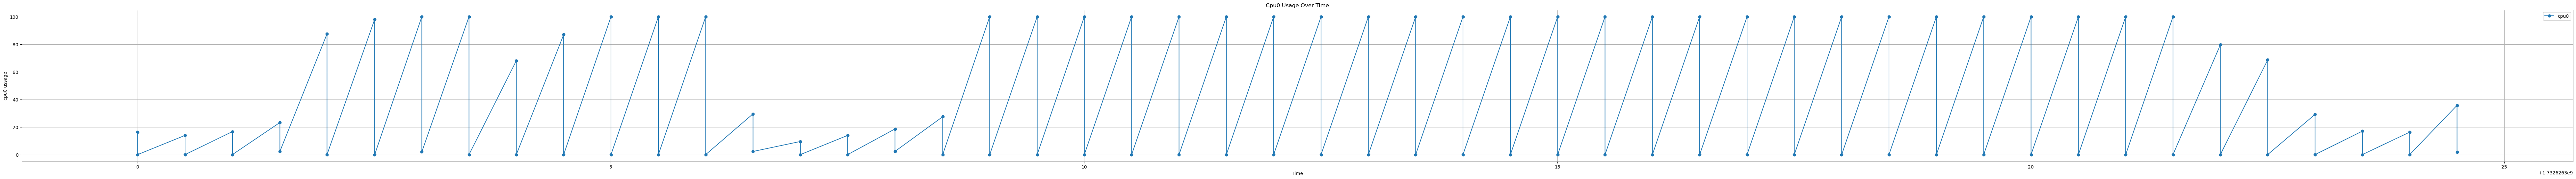

In [41]:
# Plot the data
plt.figure(figsize=(100, 6))
plt.plot(df_cpu0["Timestamp"].values[0: 100], df_cpu0["Value"].values[0: 100], marker='o', linestyle='-', label="cpu0")
plt.xlabel("Time")
plt.ylabel("cpu0 ussage")
plt.title("Cpu0 Usage Over Time")
plt.legend()
plt.grid(True)
plt.show()

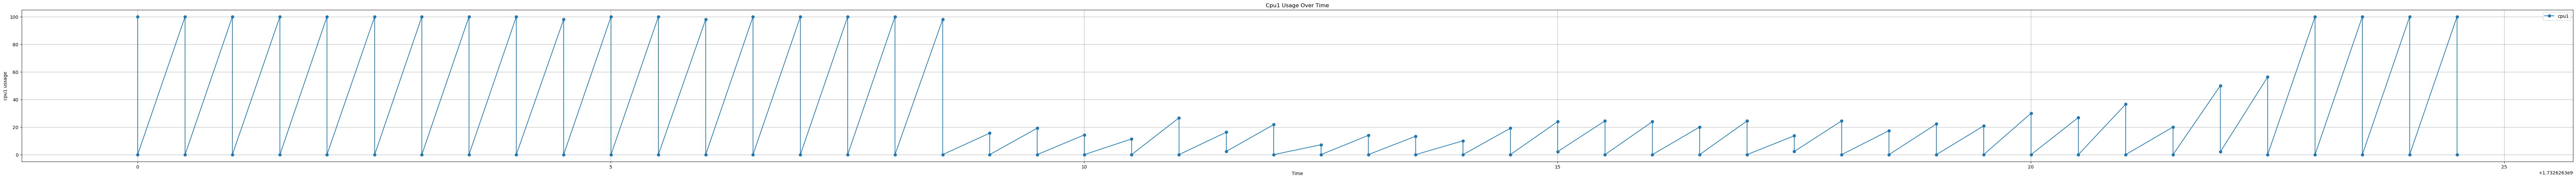

In [42]:
# Plot the data
plt.figure(figsize=(100, 6))
plt.plot(df_cpu1["Timestamp"].values[0: 100], df_cpu1["Value"].values[0: 100], marker='o', linestyle='-', label="cpu1")
plt.xlabel("Time")
plt.ylabel("cpu1 ussage")
plt.title("Cpu1 Usage Over Time")
plt.legend()
plt.grid(True)
plt.show()

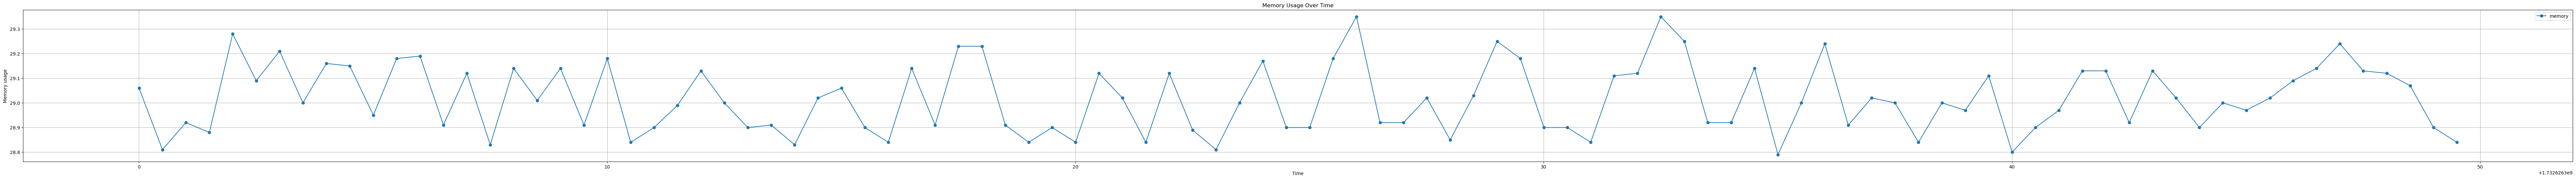

In [45]:
# Plot the data
plt.figure(figsize=(100, 6))
plt.plot(df_memory["Timestamp"].values[0: 100], df_memory["Value"].values[0: 100], marker='o', linestyle='-', label="memory")
plt.xlabel("Time")
plt.ylabel("Memory usage")
plt.title("Memory Usage Over Time")
plt.legend()
plt.grid(True)
plt.show()